# Config

In [7]:

from PIL import Image
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from datasets import load_dataset

# View

In [2]:
file_path = "E:/DL-for-Knee-decease-diagnosis/dataset/train/normal/9001695L.png"
file_size_bytes = os.path.getsize(file_path)
file_size_kb = file_size_bytes / 1024  # Chuyển đổi sang kilobytes

print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

Size: 18.36 KB (18797 bytes)


In [3]:
image_color = cv.imread(file_path, cv.IMREAD_COLOR)


In [4]:
image_color.shape

(224, 224, 3)

In [5]:
image_color.size 

150528

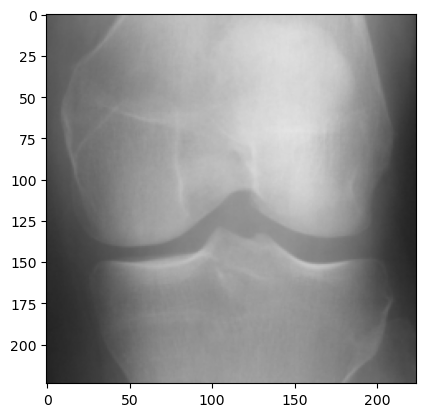

In [6]:
plt.imshow(image_color)

In [7]:
dataset_path = 'E:/DL-for-Knee-decease-diagnosis/smallData_train/'

train_dataset = load_dataset("imagefolder", data_dir=dataset_path)

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 20
    })
})

In [9]:
# Chọn một file ảnh từ folder "normal"
image_path = os.path.join(dataset_path, 'normal', os.listdir(os.path.join(dataset_path, 'normal'))[0])

# Mở ảnh bằng PIL
# image = Image.open(image_path)
image = cv.imread(image_path, cv.IMREAD_COLOR)

print(f"Shape: {image.shape}")
# In kích thước của ảnh (chiều rộng, chiều cao)
print(f"Kích thước ảnh: {image.size}")

file_size_bytes = os.path.getsize(image_path)
file_size_kb = file_size_bytes / 1024  # Chuyển đổi sang kilobytes

print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

Shape: (224, 224, 3)
Kích thước ảnh: 150528
Size: 18.36 KB (18797 bytes)


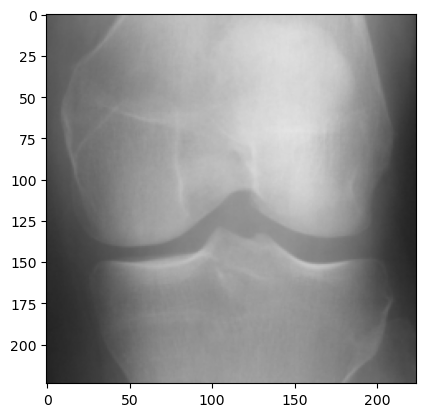

In [10]:
plt.imshow(image)

Shape (xám): (224, 224)


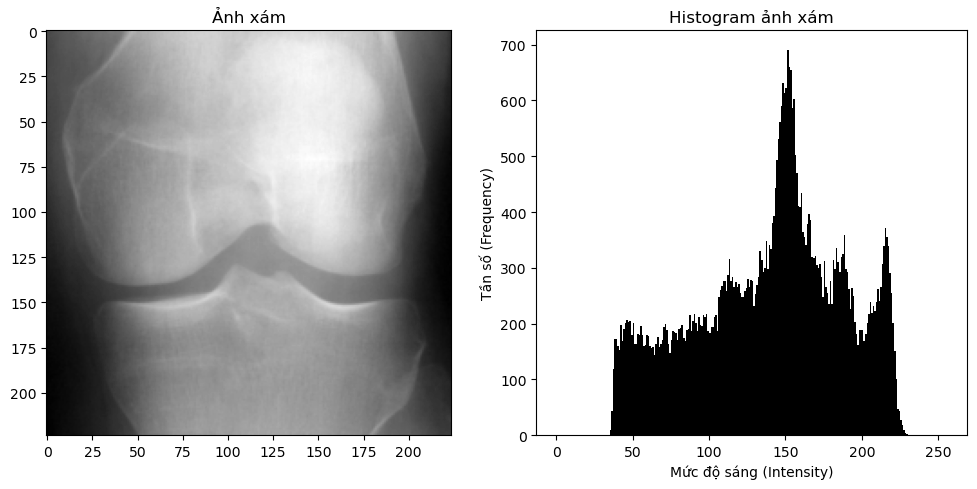

In [11]:
# Bước 1: Chuyển ảnh sang grayscale (ảnh xám)
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY)

# Kiểm tra shape của ảnh xám
print(f"Shape (xám): {image_gray.shape}")

# Bước 2: Vẽ biểu đồ histogram cho ảnh grayscale
plt.figure(figsize=(10, 5))

# Vẽ ảnh grayscale
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Ảnh xám')

# Vẽ histogram
plt.subplot(1, 2, 2)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram ảnh xám')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()

# Functions

In [5]:

def apply_histogram_equalization(image_gray, method="equalize"):
    """
    Cân bằng histogram của ảnh xám dựa trên phương pháp được chỉ định.
    method: 
        - "equalize" để sử dụng cv.equalizeHist
        - "clahe" để sử dụng Contrast Limited Adaptive Histogram Equalization (CLAHE)
    """
    if method == "equalize":
        return cv.equalizeHist(image_gray)
    elif method == "clahe":
        clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image_gray)
    else:
        raise ValueError("Phương pháp không hợp lệ. Chọn 'equalize' hoặc 'clahe'.")

def plot_image_and_histogram(image, title="Image", histogram_title="Histogram"):
    """
    Hiển thị ảnh và histogram.
    """
    plt.figure(figsize=(12, 5))

    # Hiển thị ảnh
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    
    # Hiển thị histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(histogram_title)
    plt.xlabel('Mức độ sáng (Intensity)')
    plt.ylabel('Tần số (Frequency)')
    
    plt.tight_layout()
    plt.show()

# Histogram with 1 image


In [ ]:
# Cân bằng histogram cho ảnh xám
image_gray_equalized = cv.equalizeHist(image_gray)

# Hiển thị ảnh đã được cân bằng histogram và biểu đồ histogram
plt.figure(figsize=(10, 5))

# Hiển thị ảnh đã cân bằng
plt.subplot(1, 2, 1)
plt.imshow(image_gray_equalized, cmap='gray')
plt.title('Ảnh sau khi cân bằng histogram')

# Vẽ histogram của ảnh đã cân bằng
plt.subplot(1, 2, 2)
plt.hist(image_gray_equalized.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram sau khi cân bằng')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()


In [ ]:
# Áp dụng CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_gray)

# Hiển thị ảnh CLAHE và histogram
plt.figure(figsize=(10, 5))

# Hiển thị ảnh sau CLAHE
plt.subplot(1, 2, 1)
plt.imshow(image_clahe, cmap='gray')
plt.title('Ảnh sau CLAHE')

# Vẽ histogram của ảnh CLAHE
plt.subplot(1, 2, 2)
plt.hist(image_clahe.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram sau CLAHE')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()


## Ảnh đẹp 

Shape: (224, 224, 3)
Size: 26.87 KB (27510 bytes)


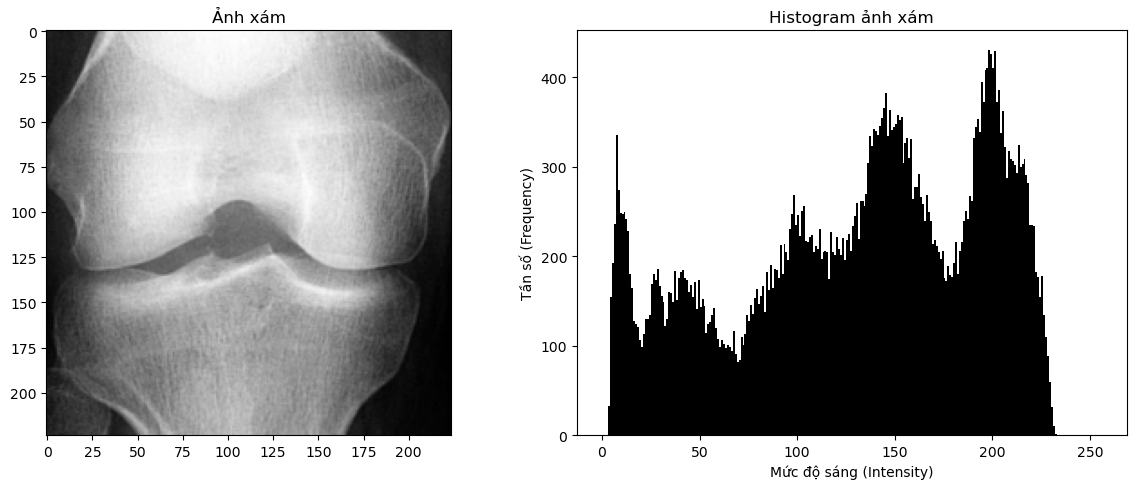

In [4]:
# 9619157R.png

image_path = "E:/DL-for-Knee-decease-diagnosis/smallData_train/normal/9619157R.png"

# Đọc ảnh bằng OpenCV
image = cv.imread(image_path, cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Chuyển sang grayscale

# Thông tin về shape và kích thước
file_size_bytes = os.path.getsize(image_path)
file_size_kb = file_size_bytes / 1024  # Đổi sang kilobytes

# In thông tin ảnh

print(f"Shape: {image.shape}")
print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

# Hiển thị ảnh xám và histogram của ảnh xám
plot_image_and_histogram(image_gray, title="Ảnh xám", histogram_title="Histogram ảnh xám")


## Ảnh quá sáng

Shape: (224, 224, 3)
Size: 15.31 KB (15681 bytes)


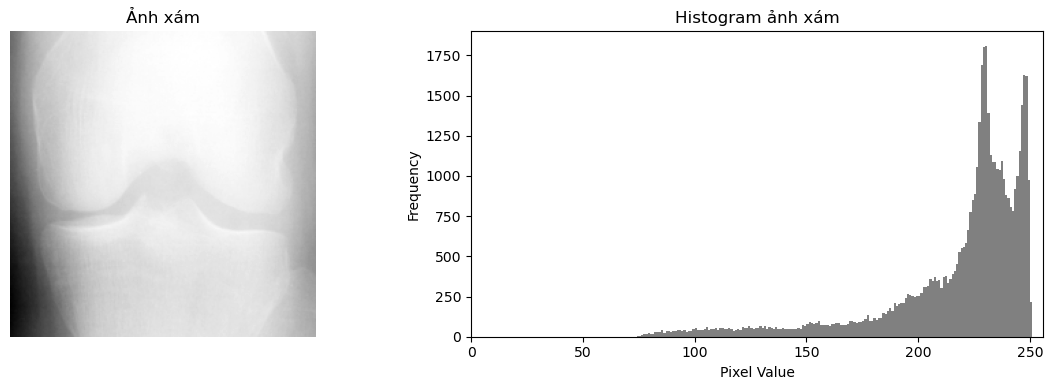

In [25]:
# image_path = os.path.join(dataset_path, 'normal', os.listdir(os.path.join(dataset_path, 'normal'))[0])
# 'E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\\9001695L.png'

image_path = "E:/DL-for-Knee-decease-diagnosis/smallData_train/normal/9003126L.png"

# dataset_path = "E:/DL-for-Knee-decease-diagnosis/smallData_train"
# image_path = os.path.join(dataset_path, 'normal', '9001695L.png') 

# Đọc ảnh bằng OpenCV
image = cv.imread(image_path, cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Chuyển sang grayscale

# Thông tin về shape và kích thước
file_size_bytes = os.path.getsize(image_path)
file_size_kb = file_size_bytes / 1024  # Đổi sang kilobytes

# In thông tin ảnh

print(f"Shape: {image.shape}")
print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

# Hiển thị ảnh xám và histogram của ảnh xám
plot_image_and_histogram(image_gray, title="Ảnh xám", histogram_title="Histogram ảnh xám")

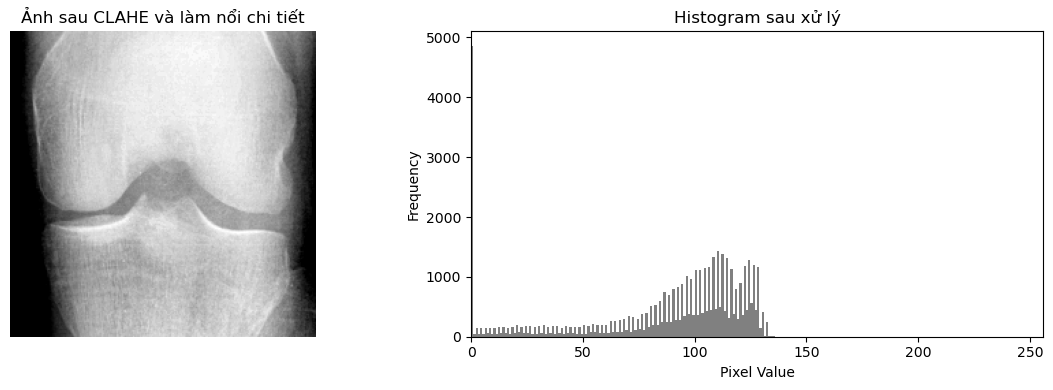

In [26]:
# Bước 1: Áp dụng CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
image_clahe = clahe.apply(image_gray)

# Bước 2: Làm nổi bật chi tiết với Unsharp Mask
gaussian_blur = cv.GaussianBlur(image_clahe, (9, 9), 10.0)
sharp_image = cv.addWeighted(image_clahe, 1.5, gaussian_blur, -0.5, 0)

# Bước 3: Giảm độ sáng tổng thể để tăng độ tương phản
final_image = cv.subtract(sharp_image, 120)

# Hiển thị kết quả
plot_image_and_histogram(final_image, title="Ảnh sau CLAHE và làm nổi chi tiết", histogram_title="Histogram sau xử lý")


## Ảnh quá tối 

Shape: (162, 300, 3)
Size: 25.31 KB (25916 bytes)


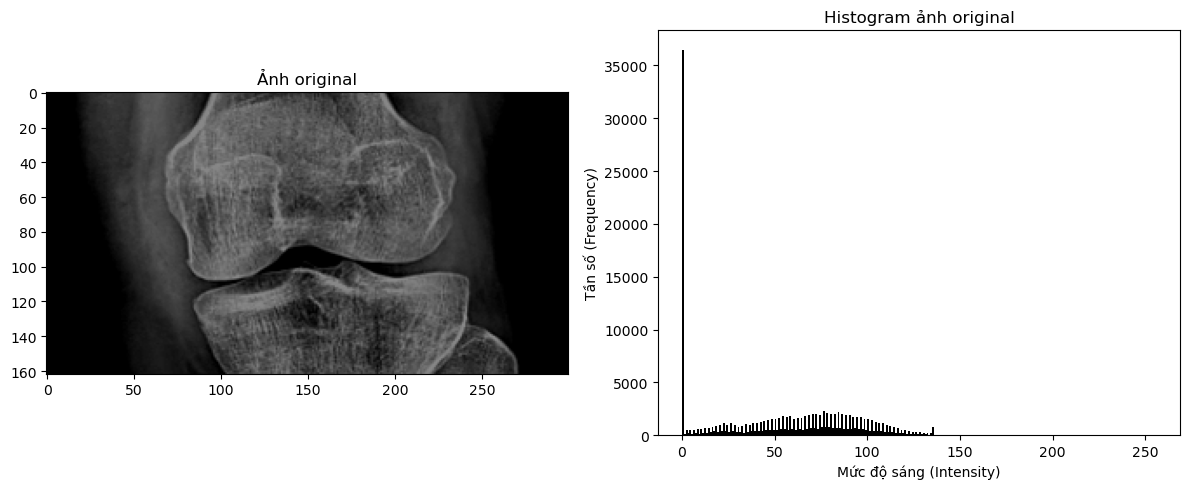

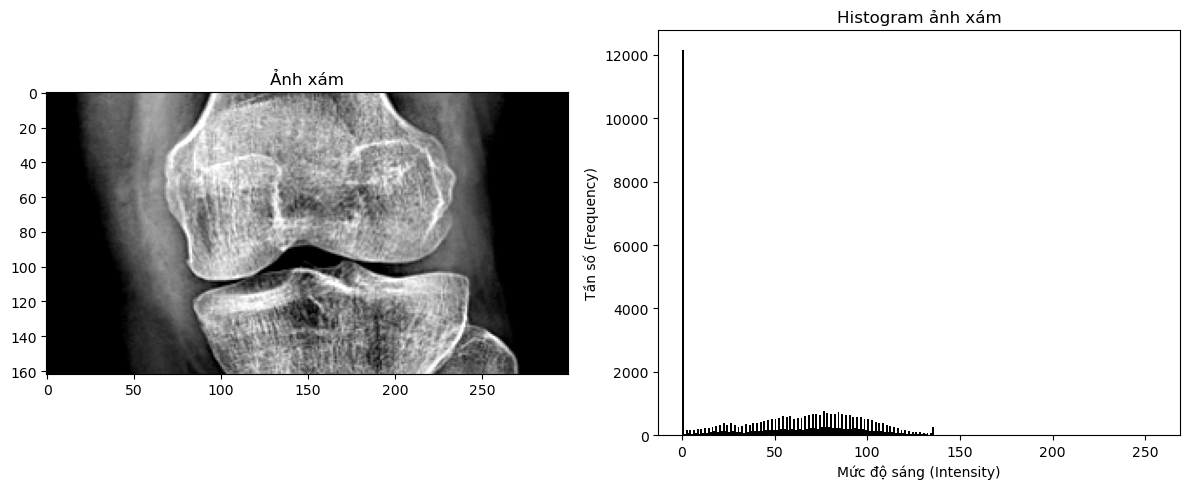

In [13]:
# image_path = "E:/DL-for-Knee-decease-diagnosis/smallData_train/normal/9116534R.png"
# image_path = r"E:\DL-for-Knee-decease-diagnosis\TestSmall\normal\9116534R.png"
image_path = r"E:\DL-for-Knee-decease-diagnosis\TestSmall\normal\NormalG0 (412).png"

# Đọc ảnh bằng OpenCV
image = cv.imread(image_path, cv.IMREAD_COLOR)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Chuyển sang grayscale

# Thông tin về shape và kích thước
file_size_bytes = os.path.getsize(image_path)
file_size_kb = file_size_bytes / 1024  # Đổi sang kilobytes

# In thông tin ảnh

print(f"Shape: {image.shape}")
print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

# Hiển thị ảnh xám và histogram của ảnh xám
plot_image_and_histogram(image, title="Ảnh original", histogram_title="Histogram ảnh original")
plot_image_and_histogram(image_gray, title="Ảnh xám", histogram_title="Histogram ảnh xám")


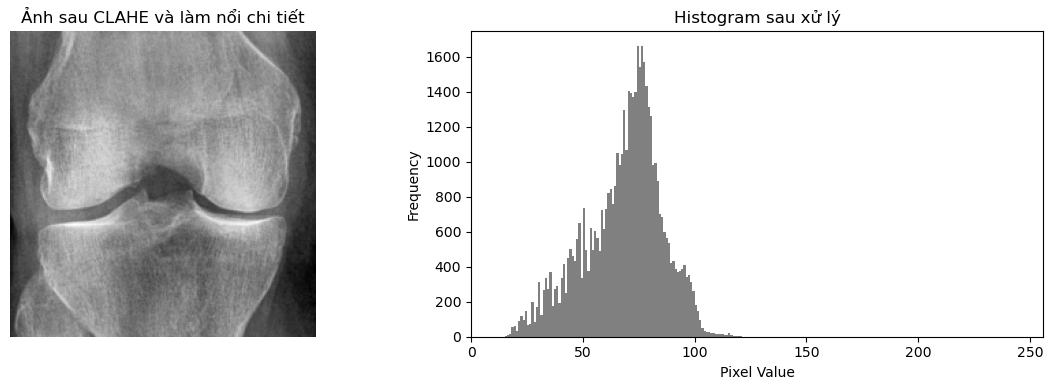

In [ ]:
# Bước 1: Áp dụng CLAHE
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
image_clahe = clahe.apply(image_gray)

# Hiển thị kết quả
plot_image_and_histogram(image_clahe, title="Ảnh sau CLAHE và làm nổi chi tiết", histogram_title="Histogram sau xử lý")

# Solve

## Normal

Processing: 9055429L.png


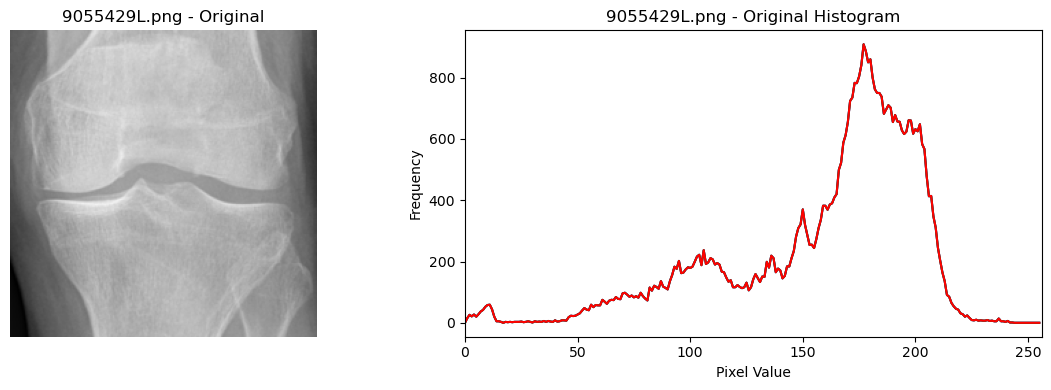

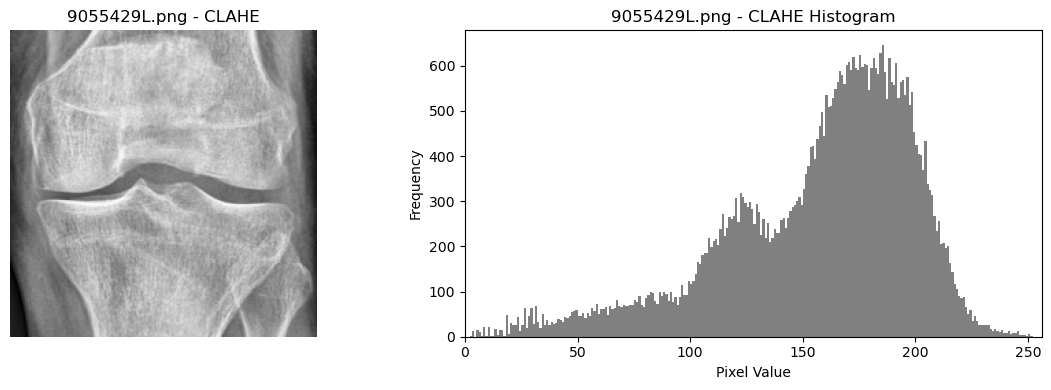

Processing: 9552043R.png


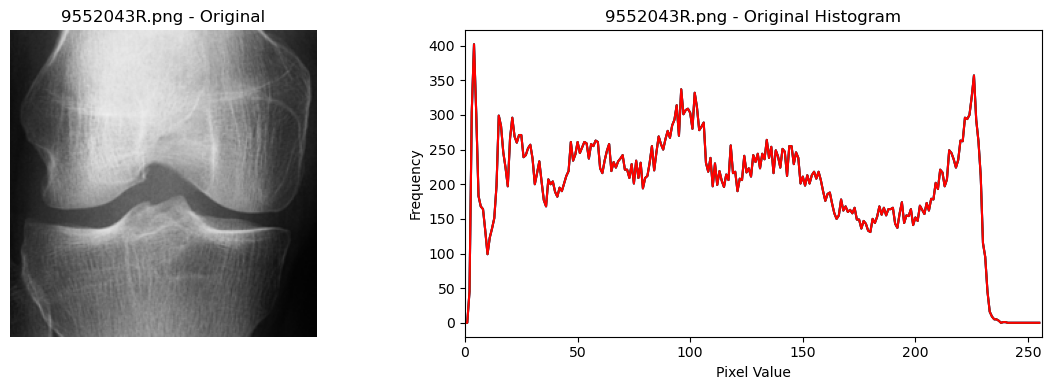

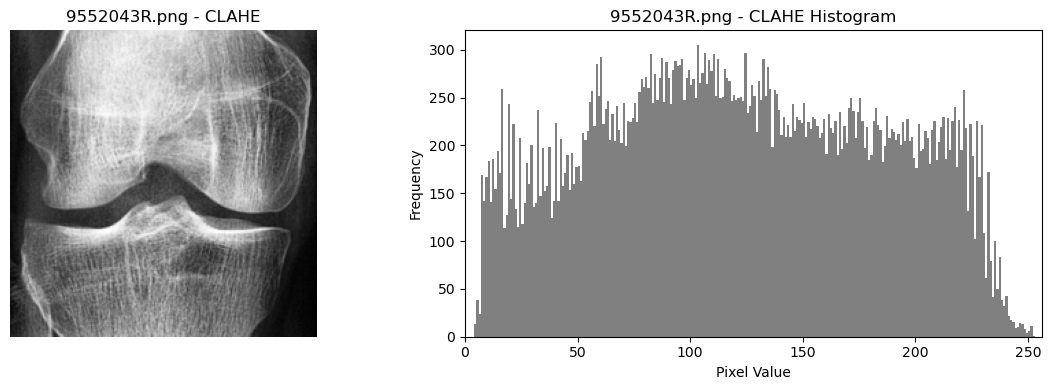

Processing: 9103449L.png


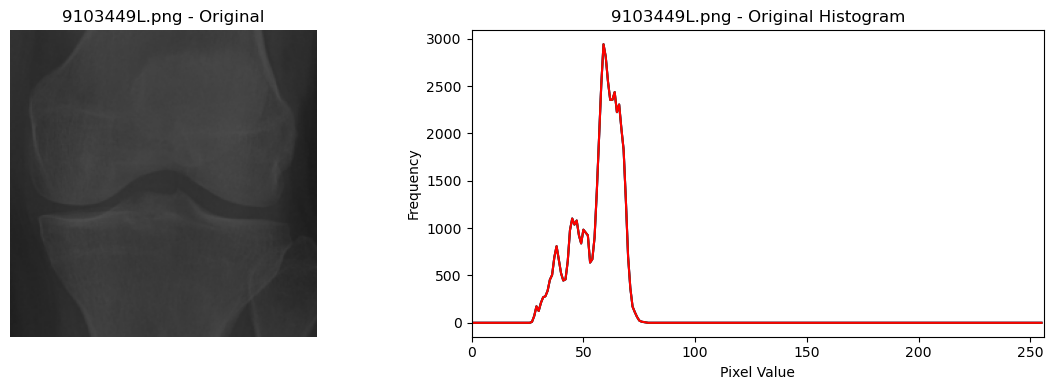

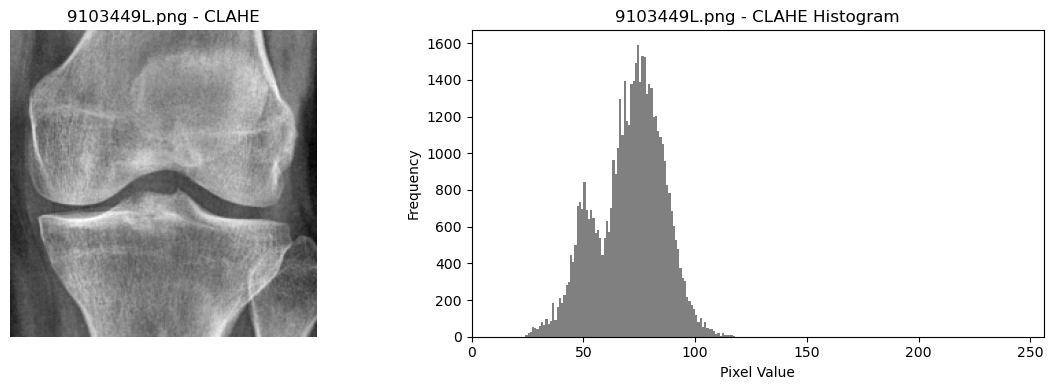

Processing: 9057150R.png


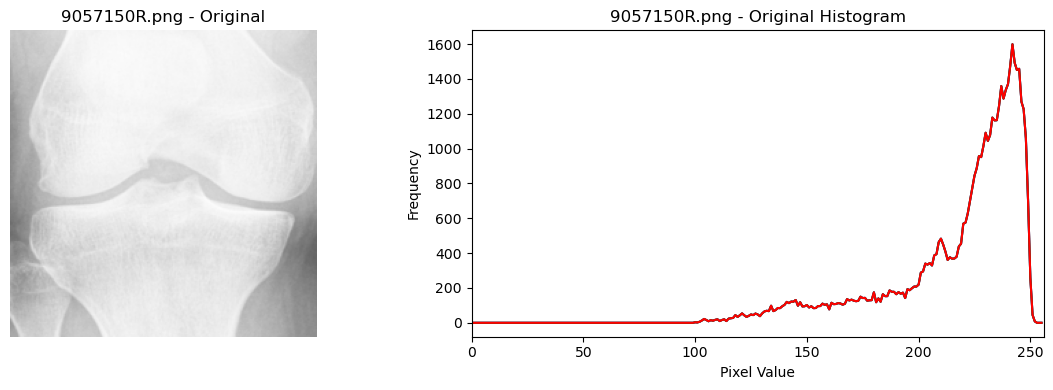

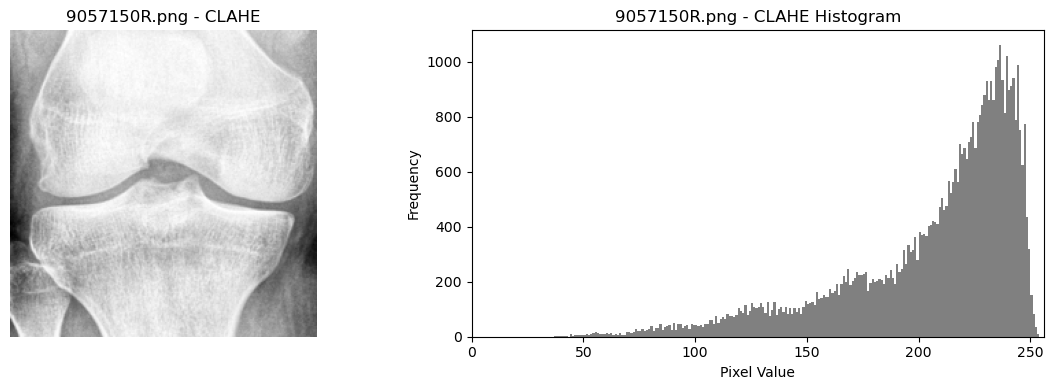

Processing: 9999510R.png


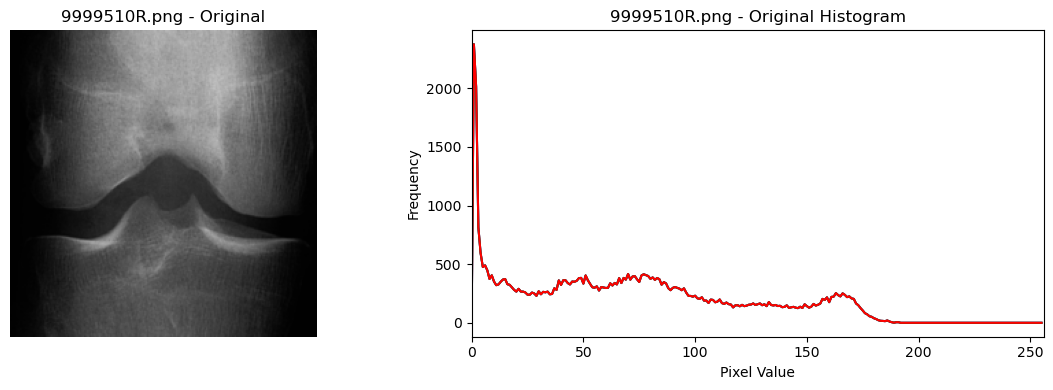

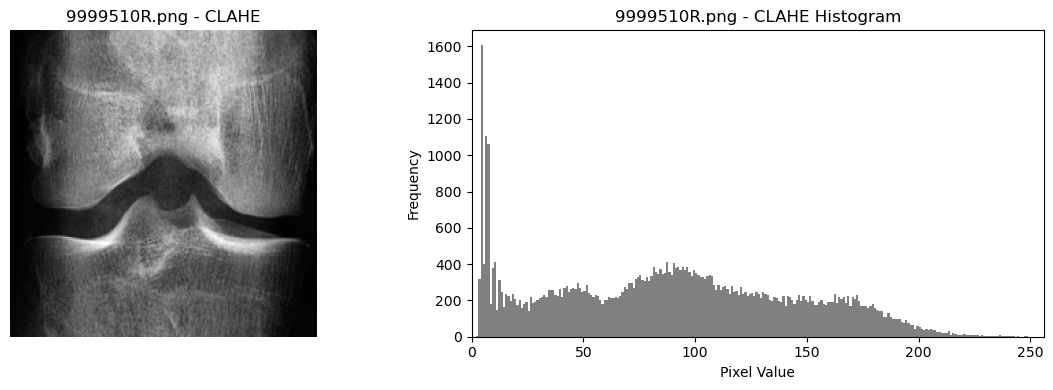

Processing: 9054866R.png


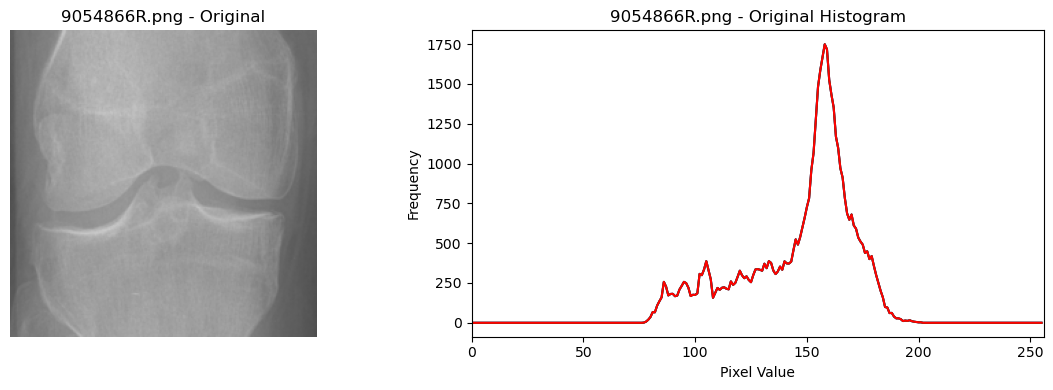

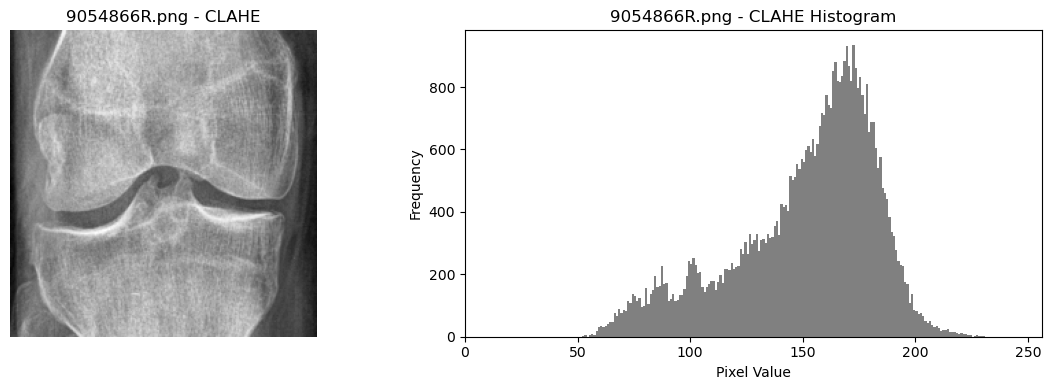

Processing: 9000622L.png


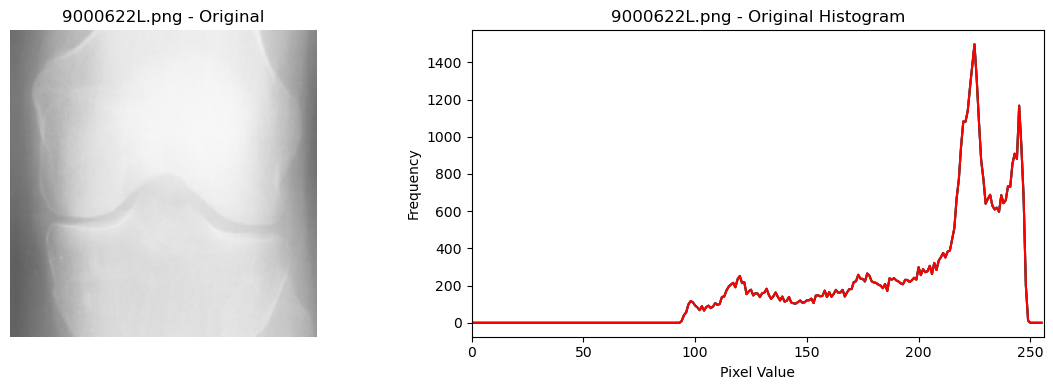

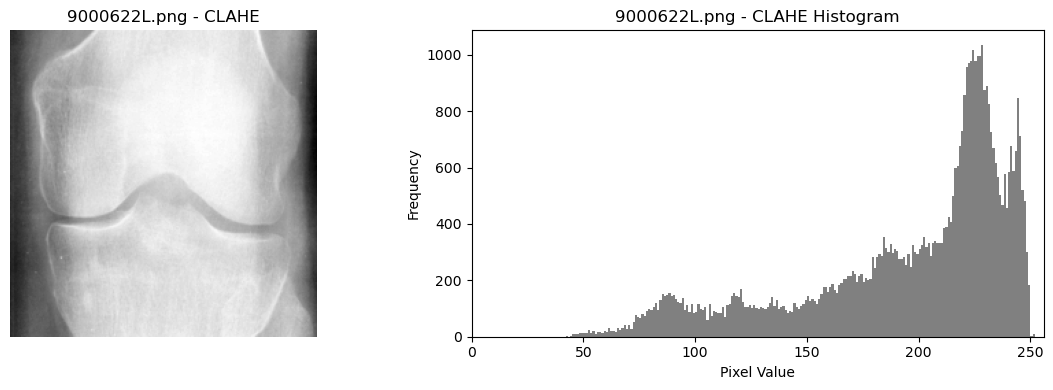

Processing: 9250129L.png


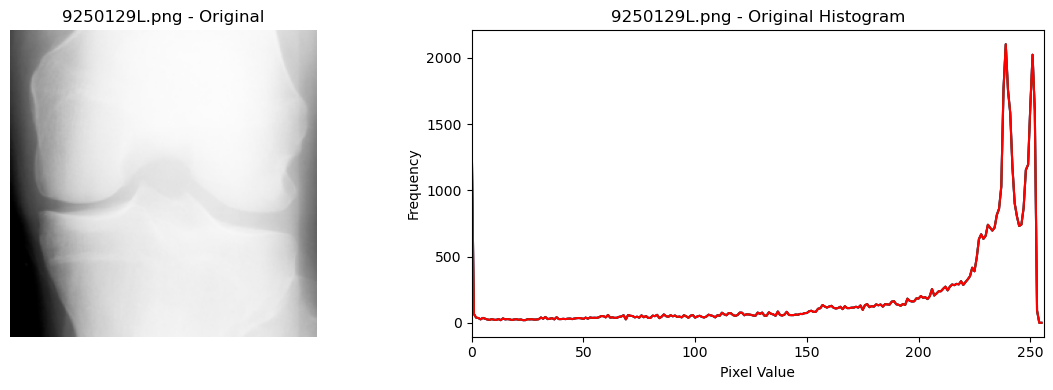

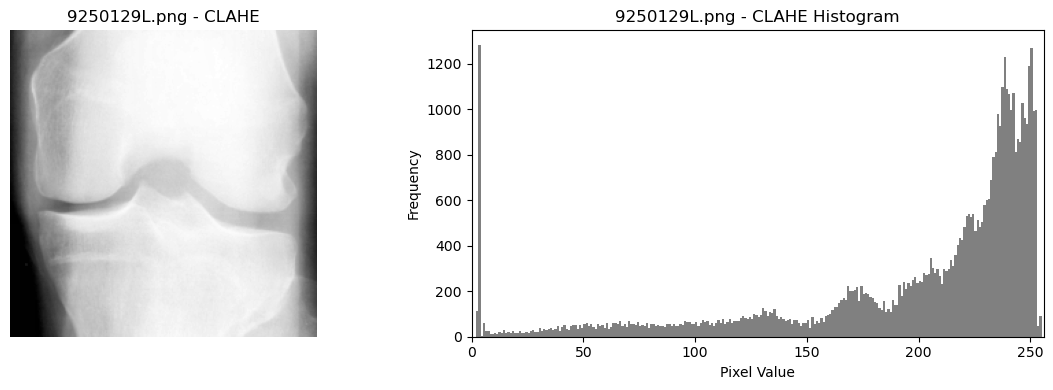

Processing: 9057479L.png


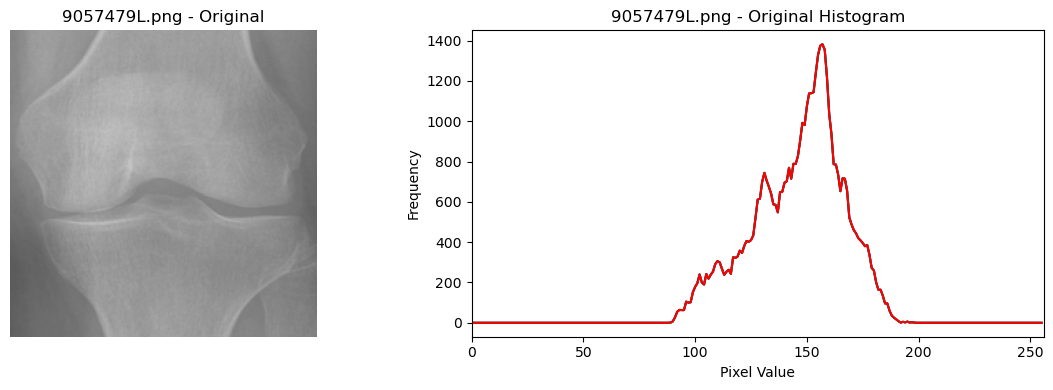

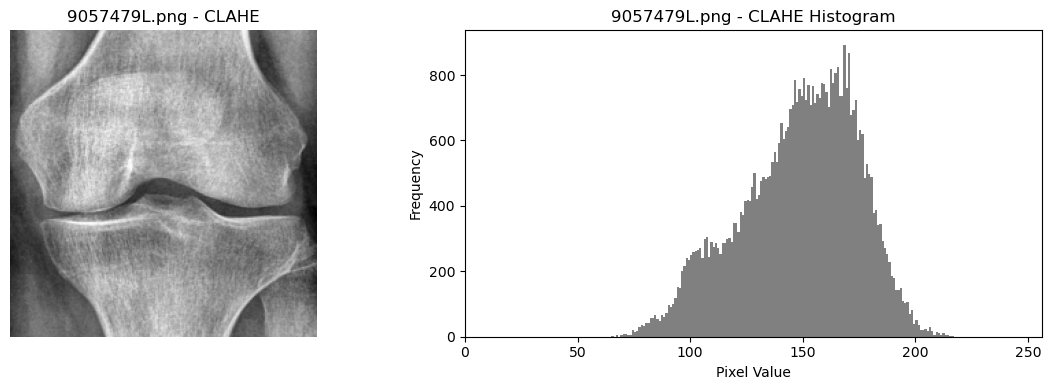

In [23]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_image_and_histogram(image, title, histogram_title):
    """
    Plots an image and its histogram.

    Args:
        image: The image to plot (NumPy array).
        title: The title of the image plot.
        histogram_title: The title of the histogram plot.
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    if len(image.shape) == 3:  # Check if the image is color
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if len(image.shape) == 3:
        hist, bins = np.histogram(image.flatten(), 256, [0, 256])
        color = ('b', 'g', 'r')
        for i, col in enumerate(color):
            histr = cv.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(histr, color=col)
            plt.xlim([0, 256])

    else:
        hist, bins = np.histogram(image.flatten(), 256, [0, 256])
        plt.hist(image.flatten(), 256, [0, 256], color='gray')
        plt.xlim([0, 256])
    plt.title(histogram_title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

def createCLAHE(image_gray, clipLimit=2.0, tileGridSize=(8, 8)):
    """
    Applies Contrast Limited Adaptive Histogram Equalization (CLAHE) to a grayscale image.

    Args:
        image_gray: The grayscale image (NumPy array).
        clipLimit: Threshold for contrast limiting. Default is 2.0.
        tileGridSize: Size of grid for histogram equalization. Default is (8, 8).

    Returns:
        The CLAHE-enhanced image (NumPy array).
    """
    clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    clahe_image = clahe.apply(image_gray)
    return clahe_image

def createHistogramEqualization(image_gray):
    """
    Applies Histogram Equalization to a grayscale image.

    Args:
        image_gray: The grayscale image (NumPy array).

    Returns:
        The Histogram Equalized image (NumPy array).
    """
    equalized_image = cv.equalizeHist(image_gray)
    return equalized_image

def PreprocessingImages(folder_name, num_images_to_show, equalization_method="clahe"):
    """
    Preprocesses images from a specified folder, applies the chosen equalization method,
    and displays a specified number of images along with their histograms.

    Args:
        folder_name (str): The name of the folder containing the images.
        num_images_to_show (int): The number of images to display.
        equalization_method (str): The equalization method to use ("clahe" or "histogram").
                                   Defaults to "clahe".
    """
    base_path = "E:/DL-for-Knee-decease-diagnosis/smallData_train/" # You can change to the location that you store your images
    folder_path = os.path.join(base_path, folder_name)

    if not os.path.exists(folder_path):
        print(f"Error: Folder not found: {folder_path}")
        return

    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    if not image_files:
        print(f"Error: No images found in: {folder_path}")
        return

    # Randomly select images to display
    selected_images = random.sample(image_files, min(num_images_to_show, len(image_files)))

    for image_file in selected_images:
        image_path = os.path.join(folder_path, image_file)
        image = cv.imread(image_path, cv.IMREAD_COLOR)

        if image is None:
            print(f"Error: Could not read image: {image_path}")
            continue

        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        print(f"Processing: {image_file}")
        plot_image_and_histogram(image, title=f"{image_file} - Original", histogram_title=f"{image_file} - Original Histogram")

        if equalization_method.lower() == "clahe":
            processed_image = createCLAHE(image_gray)
            plot_image_and_histogram(processed_image, title=f"{image_file} - CLAHE", histogram_title=f"{image_file} - CLAHE Histogram")
        elif equalization_method.lower() == "histogram":
            processed_image = createHistogramEqualization(image_gray)
            plot_image_and_histogram(processed_image, title=f"{image_file} - Histogram Equalization", histogram_title=f"{image_file} - Histogram Equalization")
        else:
            print(f"Warning: Unknown equalization method: {equalization_method}. Skipping processing.")

# --- Example Usage (as per your request) ---
PreprocessingImages('oa_doubtful', 9, equalization_method="clahe")


# Analyze

# All


In [10]:
def analyze_image_brightness(image_path, threshold_low=78, threshold_high=200):
    """
    Analyzes the brightness of an image and classifies it as too dark, too bright, or okay.

    Args:
        image_path: The path to the image file.
        threshold_low: The lower threshold for average pixel intensity (below is too dark).
        threshold_high: The upper threshold for average pixel intensity (above is too bright).

    Returns:
        A dictionary containing:
            - 'image_path': The path to the image.
            - 'brightness_category': 'too_dark', 'too_bright', or 'okay'.
            - 'average_intensity': The average pixel intensity of the image.
    """
    try:
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Could not read image at {image_path}")

        average_intensity = np.mean(image)
        

        if average_intensity < threshold_low:
            brightness_category = "too_dark"
        elif average_intensity > threshold_high:
            brightness_category = "too_bright"
        else:
            brightness_category = "okay"

        return {
            "image_path": image_path,
            "brightness_category": brightness_category,
            "average_intensity": average_intensity,
        }

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return {
            "image_path": image_path,
            "brightness_category": "error",
            "average_intensity": None,
        }


def classify_image_folders(folder_path, threshold_low=78, threshold_high=200):
    """
    Classifies the brightness of all images in a folder and its subfolders.

    Args:
        folder_path: The path to the main folder containing images.
        threshold_low: The lower threshold for average pixel intensity.
        threshold_high: The upper threshold for average pixel intensity.

    Returns:
        A dictionary where keys are brightness categories ('too_dark', 'too_bright', 'okay', 'error')
        and values are lists of image paths belonging to that category.
    """
    results = {"too_dark": [], "too_bright": [], "okay": [], "error": []}

    if not os.path.exists(folder_path):
        print(f"Error: Folder not found: {folder_path}")
        return results

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Check for common image extensions
                image_path = os.path.join(root, file)
                analysis = analyze_image_brightness(image_path, threshold_low, threshold_high)
                results[analysis["brightness_category"]].append(
                    {
                        "image_path": image_path,
                        "average_intensity": analysis["average_intensity"]
                    }
                )
    return results

# --- Example Usage ---
folder_to_analyze = "E:/DL-for-Knee-decease-diagnosis/smallData_train/"  # Replace with your folder path
analysis_results = classify_image_folders(folder_to_analyze)

# Print the results in a structured way
for category, image_list in analysis_results.items():
    print(f"\n--- {category.upper()} images ---")
    if not image_list:
        print("   No images in this category.")
        continue

    for image_data in image_list:
        print(f"   - {image_data['image_path']} (Average Intensity: {image_data['average_intensity']:.2f})")




--- TOO_DARK images ---
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\9116534R.png (Average Intensity: 50.04)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\N11.JPEG (Average Intensity: 71.51)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\N27.jpg (Average Intensity: 55.70)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\N28.jpg (Average Intensity: 50.56)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\N29.jpg (Average Intensity: 65.90)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\N4.JPEG (Average Intensity: 66.10)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/normal\N5.JPEG (Average Intensity: 61.08)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/oa_doubtful\9103449L.png (Average Intensity: 56.32)
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/oa_doubtful\9999510R.png (Average Intensity: 69.30)

--- TOO_BRIGHT images ---
   - E:/DL-for-Knee-decease-diagnosis/smallData_train/norm

In [ ]:

def analyze_image_brightness(image_path, threshold_low=78, threshold_high=170):
    """
    Analyzes the brightness of an image and classifies it as too dark, too bright, or okay.

    Args:
        image_path: The path to the image file.
        threshold_low: The lower threshold for average pixel intensity (below is too dark).
        threshold_high: The upper threshold for average pixel intensity (above is too bright).

    Returns:
        A dictionary containing:
            - 'image_path': The path to the image.
            - 'brightness_category': 'too_dark', 'too_bright', or 'okay'.
            - 'average_intensity': The average pixel intensity of the image.
    """
    try:
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError(f"Could not read image at {image_path}")

        average_intensity = np.mean(image)

        if average_intensity < threshold_low:
            brightness_category = "too_dark"
        elif average_intensity > threshold_high:
            brightness_category = "too_bright"
        else:
            brightness_category = "okay"

        return {
            "image_path": image_path,
            "brightness_category": brightness_category,
            "average_intensity": average_intensity,
        }

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return {
            "image_path": image_path,
            "brightness_category": "error",
            "average_intensity": None,
        }

def apply_clahe_and_unsharp(image_gray):
    """
    Applies CLAHE, unsharp masking, and contrast adjustment to a grayscale image.

    Args:
        image_gray: The grayscale image (NumPy array).

    Returns:
        The processed image (NumPy array).
    """
    # CLAHE
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    image_clahe = clahe.apply(image_gray)

    # Unsharp Masking
    gaussian_blur = cv.GaussianBlur(image_clahe, (9, 9), 10.0)
    sharp_image = cv.addWeighted(image_clahe, 1.5, gaussian_blur, -0.5, 0)

    # Contrast Adjustment (reduce brightness)
    final_image = cv.subtract(sharp_image, 120)

    return final_image

def createCLAHE(image_gray, clipLimit=2.0, tileGridSize=(8, 8)):
    """
    Applies Contrast Limited Adaptive Histogram Equalization (CLAHE) to a grayscale image.

    Args:
        image_gray: The grayscale image (NumPy array).
        clipLimit: Threshold for contrast limiting. Default is 2.0.
        tileGridSize: Size of grid for histogram equalization. Default is (8, 8).

    Returns:
        The CLAHE-enhanced image (NumPy array).
    """
    clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    clahe_image = clahe.apply(image_gray)
    return clahe_image

def PreprocessingImages(input_folder, output_folder, except_folders, threshold_low=78, threshold_high=170):
    """
    Preprocesses images from a specified input folder, applies the chosen equalization method,
    and saves the processed images to the output folder.
    It also skips processing for folders listed in except_folders.

    Args:
        input_folder (str): The path to the folder containing the images.
        output_folder (str): The path to the folder where processed images will be saved.
        except_folders (list): A list of folder names to exclude from processing.
        threshold_low (int) : The lower threshold for average pixel intensity.
        threshold_high (int): The upper threshold for average pixel intensity.
    """
    if not os.path.exists(input_folder):
        print(f"Error: Input folder not found: {input_folder}")
        return

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Created output folder: {output_folder}")

    for folder_name in os.listdir(input_folder):
        if folder_name in except_folders:
            print(f"Skipping folder: {folder_name}")
            continue

        folder_path = os.path.join(input_folder, folder_name)
        if not os.path.isdir(folder_path):
            continue
    
        output_folder_path = os.path.join(output_folder, folder_name)
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)
            print(f"Created output subfolder: {output_folder_path}")

        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        if not image_files:
            print(f"Warning: No images found in: {folder_path}")
            continue

        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            image = cv.imread(image_path, cv.IMREAD_COLOR)

            if image is None:
                print(f"Error: Could not read image: {image_path}")
                continue

            image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

            print(f"Processing: {image_file} in {folder_name}")

            analysis = analyze_image_brightness(image_path, threshold_low, threshold_high)

            if analysis["brightness_category"] == "too_bright":
                processed_image = apply_clahe_and_unsharp(image_gray)
            else:  # "too_dark" or "okay"
                processed_image = createCLAHE(image_gray)

            output_image_path = os.path.join(output_folder_path, image_file)
            cv.imwrite(output_image_path, processed_image)
            print(f"Saved processed image to: {output_image_path}")





In [ ]:
# --- Example Usage ---
input_folder = "E:/DL-for-Knee-decease-diagnosis/smallData_train/"
output_folder = "E:/DL-for-Knee-decease-diagnosis/TestSmall"
except_folders = ["osteopenia", "osteoporosis"]

PreprocessingImages(input_folder, output_folder, except_folders)

## Full data

In [15]:
# --- Example Usage (as per your request) ---
input_folder = "E:/DL-for-Knee-decease-diagnosis/dataset/train"
output_folder = "E:/DL-for-Knee-decease-diagnosis/output_clahe"
except_folders = ["osteopenia", "osteoporosis"]

PreprocessingImages(input_folder, output_folder, except_folders)

Created output folder: E:/DL-for-Knee-decease-diagnosis/output_clahe
Created output subfolder: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal
Processing: 9001695L.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal\9001695L.png
Processing: 9001897L.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal\9001897L.png
Processing: 9003126L.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal\9003126L.png
Processing: 9003126R.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal\9003126R.png
Processing: 9003430L.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal\9003430L.png
Processing: 9003658L.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagnosis/output_clahe\normal\9003658L.png
Processing: 9003658R.png in normal
Saved processed image to: E:/DL-for-Knee-decease-diagno